In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Keras Syntax Basics

In [2]:
df = pd.read_csv('../DATA/fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


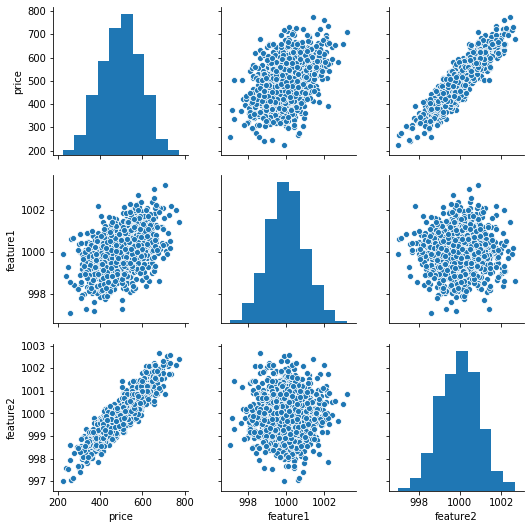

In [4]:
sns.pairplot(df)

In [6]:
from sklearn.model_selection import train_test_split

X = df[['feature1', 'feature2']].values
y = df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
X_train.shape

(700, 2)

In [8]:
X_test.shape

(300, 2)

In [9]:
y_train.shape

(700,)

In [10]:
y_test.shape

(300,)

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [12]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_train.min(), X_train.max()

(0.0, 1.0)

In [19]:
X_test.min(), X_test.max()

(-0.014108392024496652, 1.0186515935232023)

# TensorFlow 2.0 Syntax

## Import Options

There are several ways you can import Keras from Tensorflow (this is hugely a personal style choice, please use any import methods you prefer). We will use the method shown in the **official TF documentation**.

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [26]:
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

# Final output
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

In [37]:
model.fit(X_train, y_train, epochs=250)

Train on 700 samples
Epoch 1/250
700/700 [==============================] - 0s 262us/sample - loss: 24.2442
Epoch 2/250
700/700 [==============================] - 0s 157us/sample - loss: 24.4317
Epoch 3/250
700/700 [==============================] - 0s 141us/sample - loss: 24.3815
Epoch 4/250
700/700 [==============================] - 0s 170us/sample - loss: 24.5332
Epoch 5/250
700/700 [==============================] - 0s 151us/sample - loss: 24.2796
Epoch 6/250
700/700 [==============================] - 0s 135us/sample - loss: 24.0067
Epoch 7/250
700/700 [==============================] - 0s 137us/sample - loss: 24.1560
Epoch 8/250
700/700 [==============================] - 0s 153us/sample - loss: 24.2032
Epoch 9/250
700/700 [==============================] - 0s 135us/sample - loss: 24.3471
Epoch 10/250
700/700 [==============================] - 0s 161us/sample - loss: 24.3492
Epoch 11/250
700/700 [==============================] - 0s 147us/sample - loss: 24.1209
Epoch 12/250
700/700

Epoch 94/250
700/700 [==============================] - 0s 157us/sample - loss: 24.2848
Epoch 95/250
700/700 [==============================] - 0s 139us/sample - loss: 24.0433
Epoch 96/250
700/700 [==============================] - 0s 144us/sample - loss: 24.2285
Epoch 97/250
700/700 [==============================] - 0s 142us/sample - loss: 24.3834
Epoch 98/250
700/700 [==============================] - 0s 153us/sample - loss: 23.9876
Epoch 99/250
700/700 [==============================] - 0s 145us/sample - loss: 24.3175
Epoch 100/250
700/700 [==============================] - 0s 148us/sample - loss: 24.0124
Epoch 101/250
700/700 [==============================] - 0s 140us/sample - loss: 24.2503
Epoch 102/250
700/700 [==============================] - 0s 143us/sample - loss: 24.1800
Epoch 103/250
700/700 [==============================] - 0s 144us/sample - loss: 24.3933
Epoch 104/250
700/700 [==============================] - 0s 156us/sample - loss: 24.3665
Epoch 105/250
700/700 [====

700/700 [==============================] - ETA: 0s - loss: 24.72 - 0s 151us/sample - loss: 24.3799
Epoch 187/250
700/700 [==============================] - 0s 153us/sample - loss: 24.4796
Epoch 188/250
700/700 [==============================] - 0s 138us/sample - loss: 24.2679
Epoch 189/250
700/700 [==============================] - 0s 156us/sample - loss: 24.1559
Epoch 190/250
700/700 [==============================] - 0s 137us/sample - loss: 24.2644
Epoch 191/250
700/700 [==============================] - 0s 138us/sample - loss: 24.1518
Epoch 192/250
700/700 [==============================] - 0s 154us/sample - loss: 24.3885
Epoch 193/250
700/700 [==============================] - 0s 150us/sample - loss: 24.0623
Epoch 194/250
700/700 [==============================] - 0s 136us/sample - loss: 24.1891
Epoch 195/250
700/700 [==============================] - 0s 150us/sample - loss: 24.4874
Epoch 196/250
700/700 [==============================] - 0s 155us/sample - loss: 24.2430
Epoch 197/2

### Evaluation

In [30]:
df_loss = pd.DataFrame(model.history.history)
df_loss

,loss
0,256709.395179
1,256675.056607
2,256643.628571
3,256609.372411
4,256571.018839
...,...
245,24.902336
246,24.647988
247,24.523955
248,24.285941


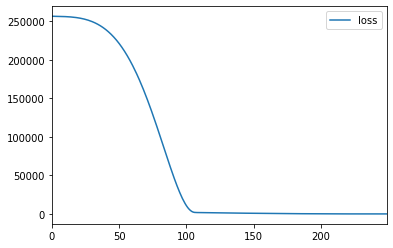

In [31]:
df_loss.plot()

### MSE on Training set and test set

In [38]:
model.metrics_names

['loss']

In [43]:
training_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose=0)

In [44]:
training_score

23.728365031651087

In [45]:
test_score

25.14076515197754

In [57]:
test_predictions = model.predict(X_test)

In [58]:
test_predictions = pd.Series(test_predictions.reshape(300,))
test_y_df = pd.DataFrame(y_test, columns=['Test Y'])

pred_df = pd.concat([test_y_df, test_predictions], axis=1)
pred_df.columns = ['Test Y', 'Model Predictions']

In [60]:
pred_df

,Test Y,Model Predictions
0,402.296319,405.513763
1,624.156198,624.023254
2,582.455066,592.579041
3,578.588606,572.646729
4,371.224104,366.790436
...,...,...
295,525.704657,529.414429
296,502.909473,515.370544
297,612.727910,610.119263
298,417.569725,417.194855


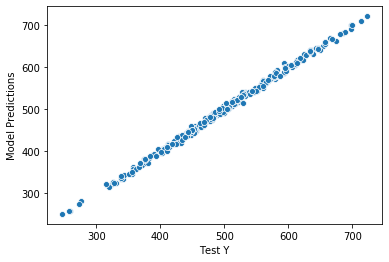

In [61]:
sns.scatterplot(x='Test Y', y='Model Predictions', data=pred_df)

In [63]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']
pred_df

,Test Y,Model Predictions,Error
0,402.296319,405.513763,-3.217445
1,624.156198,624.023254,0.132944
2,582.455066,592.579041,-10.123974
3,578.588606,572.646729,5.941878
4,371.224104,366.790436,4.433668
...,...,...,...
295,525.704657,529.414429,-3.709772
296,502.909473,515.370544,-12.461071
297,612.727910,610.119263,2.608648
298,417.569725,417.194855,0.374870


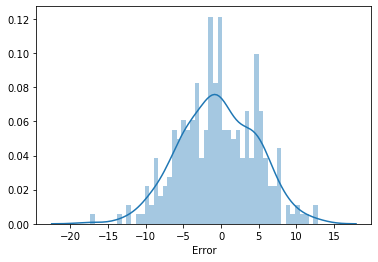

In [65]:
sns.distplot(pred_df['Error'], bins=50)

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [69]:
mean_absolute_error(pred_df['Model Predictions'], pred_df['Test Y'])

4.023981418928036

In [70]:
mean_squared_error(pred_df['Model Predictions'], pred_df['Test Y'])

25.140767886056366

In [71]:
mean_squared_error(pred_df['Model Predictions'], pred_df['Test Y']) ** 0.5

5.014057028600329

### Predicting on brand new data

In [78]:
new_gem = [[998, 1000]]

In [79]:
new_gem = scaler.transform(new_gem)

In [80]:
model.predict(new_gem)

array([[419.92395]], dtype=float32)

### Saving and Loading a Model

In [75]:
from tensorflow.keras.models import load_model

model.save('my_model_2.h5')

In [76]:
later_model = load_model('my_model_2.h5')

In [81]:
later_model.predict(new_gem)

array([[419.92395]], dtype=float32)

# Keras Regression

In [82]:
df = pd.read_csv('../DATA/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Exploratory Data Analysis

In [84]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [85]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


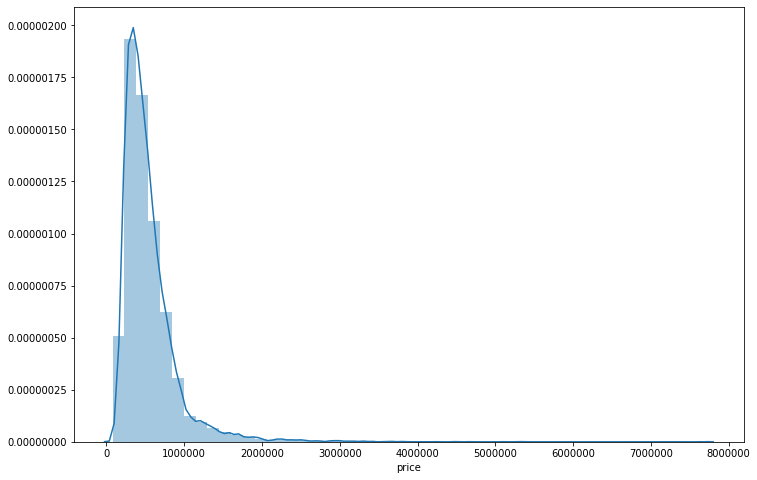

In [87]:
plt.figure(figsize=(12, 8))

sns.distplot(df['price'])

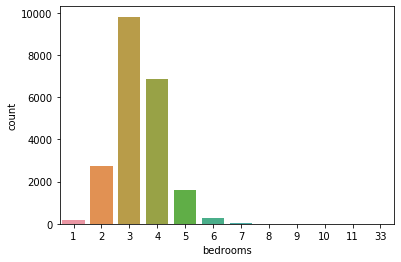

In [88]:
sns.countplot(df['bedrooms'])

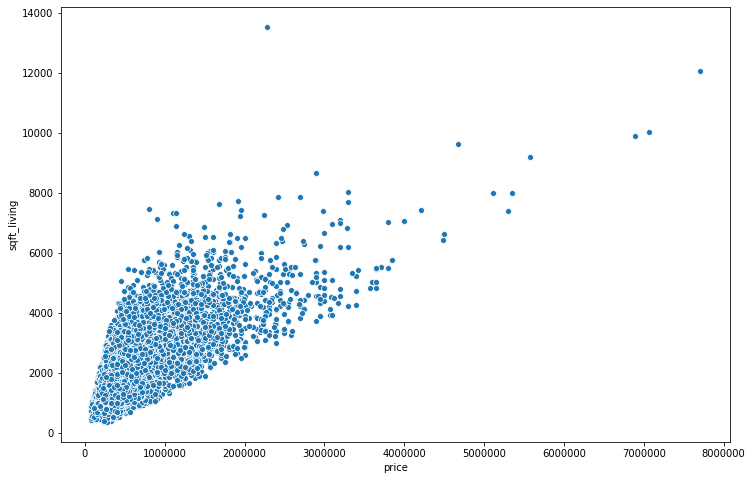

In [89]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x='price', y='sqft_living', data=df)

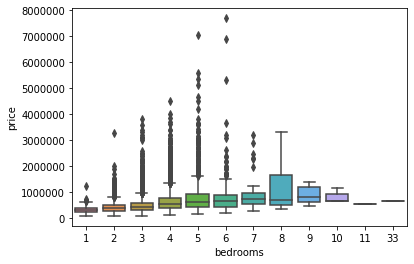

In [90]:
sns.boxplot('bedrooms', 'price', data=df)

### Geographical Properties

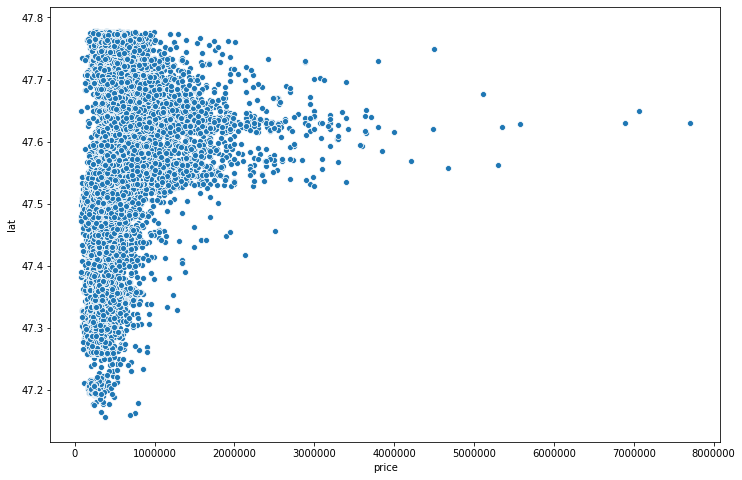

In [91]:
plt.figure(figsize=(12, 8))

sns.scatterplot('price', 'long', data=df)

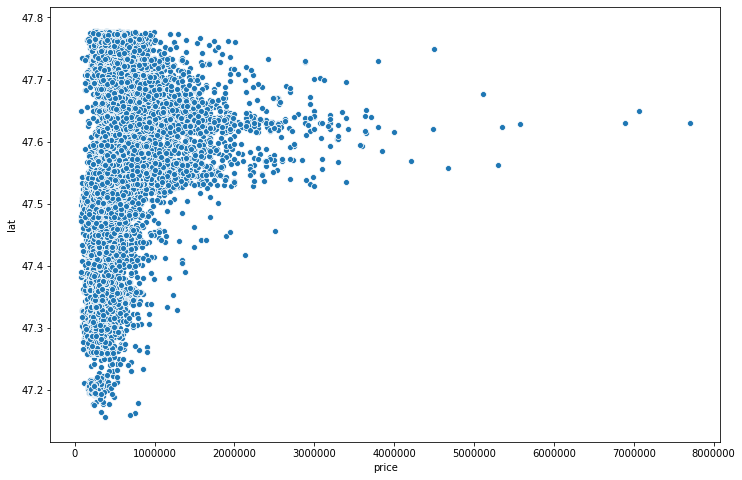

In [92]:
plt.figure(figsize=(12, 8))

sns.scatterplot('price', 'lat', data=df)

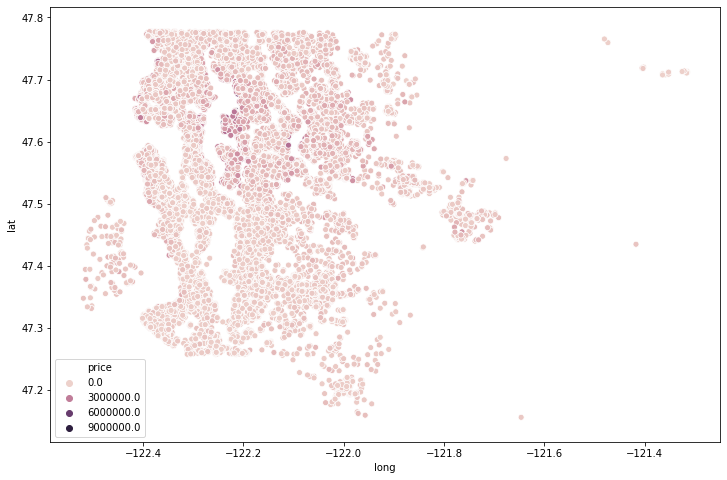

In [93]:
plt.figure(figsize=(12, 8))

sns.scatterplot('long', 'lat', hue='price', data=df)

In [94]:
df.sort_values('price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [96]:
non_top_1_perc = df.sort_values('price', ascending=False).iloc[216:]

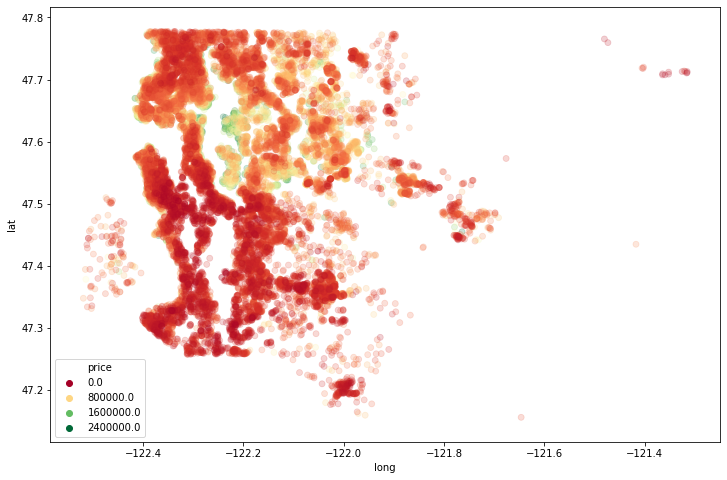

In [102]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x='long', y='lat',
                data=non_top_1_perc, hue='price',
                palette='RdYlGn', edgecolor=None, alpha=0.2)

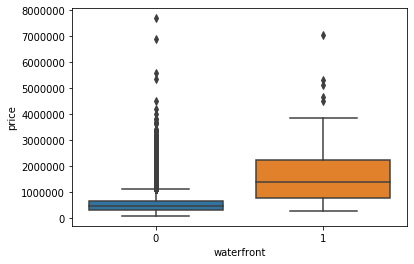

In [103]:
sns.boxplot('waterfront', 'price', data=df)

## Working with Feature Data

In [104]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [106]:
df.drop('id', axis=1, inplace=True)

In [107]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Feature Engineering from Date

In [109]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda date: date.month)
df['year'] = df['date'].apply(lambda date: date.year)

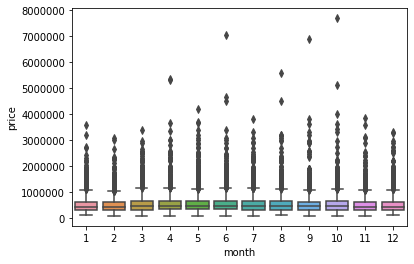

In [111]:
sns.boxplot(x='month',y='price',data=df)

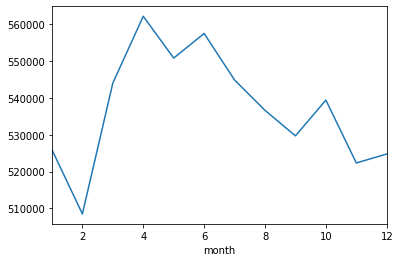

In [115]:
df.groupby('month').mean()['price'].plot()

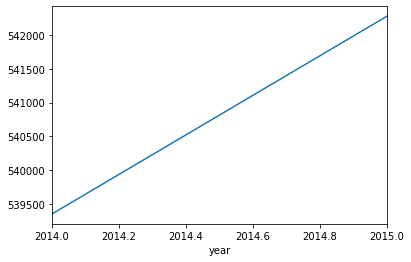

In [116]:
df.groupby('year').mean()['price'].plot()

In [117]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [118]:
df.drop('zipcode', axis=1, inplace=True)

In [125]:
df = df.drop('date',axis=1)

In [119]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


## Scaling and Train Test Split

In [127]:
X = df.drop('price', axis=1).values
y = df['price'].values

In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Scaling

In [129]:
from sklearn.preprocessing import MinMaxScaler

In [130]:
X_train

array([[4.0000e+00, 1.0000e+00, 2.2900e+03, ..., 6.3000e+03, 9.0000e+00,
        2.0140e+03],
       [3.0000e+00, 2.2500e+00, 1.6300e+03, ..., 3.1310e+03, 6.0000e+00,
        2.0140e+03],
       [4.0000e+00, 3.5000e+00, 2.8500e+03, ..., 5.7080e+03, 5.0000e+00,
        2.0150e+03],
       ...,
       [2.0000e+00, 1.7500e+00, 1.8000e+03, ..., 7.4000e+03, 4.0000e+00,
        2.0150e+03],
       [3.0000e+00, 2.0000e+00, 1.5000e+03, ..., 1.4013e+04, 4.0000e+00,
        2.0150e+03],
       [2.0000e+00, 1.0000e+00, 1.1600e+03, ..., 5.0760e+03, 1.0000e+00,
        2.0150e+03]])

In [131]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [132]:
X_train.shape

(15117, 19)

In [133]:
X_test.shape

(6480, 19)

### Creating a Model

In [134]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [192]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

### Training a Model

In [193]:
model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          batch_size=128, epochs=800)

Train on 15117 samples, validate on 6480 samples
Epoch 1/800
15117/15117 [==============================] - 3s 203us/sample - loss: 430215859979.8711 - val_loss: 418719220480.6321
Epoch 2/800
15117/15117 [==============================] - 1s 71us/sample - loss: 422897965168.8520 - val_loss: 388897878511.5654
Epoch 3/800
15117/15117 [==============================] - 1s 66us/sample - loss: 291228509227.8267 - val_loss: 133721151978.5086
Epoch 4/800
15117/15117 [==============================] - 1s 66us/sample - loss: 103567232378.8604 - val_loss: 94066898342.2420
Epoch 5/800
15117/15117 [==============================] - 1s 71us/sample - loss: 95674303982.6929 - val_loss: 91274618925.5111
Epoch 6/800
15117/15117 [==============================] - 2s 117us/sample - loss: 92728196424.3953 - val_loss: 88417005942.2025
Epoch 7/800
15117/15117 [==============================] - 1s 93us/sample - loss: 89728778507.1599 - val_loss: 85483912386.6864
Epoch 8/800
15117/15117 [=====================

15117/15117 [==============================] - 2s 134us/sample - loss: 34213393908.9248 - val_loss: 32884488561.1457
Epoch 65/800
15117/15117 [==============================] - 2s 126us/sample - loss: 34097161984.0847 - val_loss: 32628758366.1827
Epoch 66/800
15117/15117 [==============================] - 2s 107us/sample - loss: 34024023084.9782 - val_loss: 32538373132.6420
Epoch 67/800
15117/15117 [==============================] - 1s 73us/sample - loss: 33892654681.1436 - val_loss: 32457149290.8247
Epoch 68/800
15117/15117 [==============================] - 1s 86us/sample - loss: 33825620740.4877 - val_loss: 32347681895.6642
Epoch 69/800
15117/15117 [==============================] - 1s 78us/sample - loss: 33793474242.3073 - val_loss: 32258081334.3605
Epoch 70/800
15117/15117 [==============================] - 1s 71us/sample - loss: 33658386344.8885 - val_loss: 32315345083.1012
Epoch 71/800
15117/15117 [==============================] - 1s 73us/sample - loss: 33672715399.6121 - val_l

15117/15117 [==============================] - 2s 106us/sample - loss: 31486924550.8585 - val_loss: 29609515407.4864
Epoch 128/800
15117/15117 [==============================] - 1s 93us/sample - loss: 31417318643.4515 - val_loss: 29586839885.7481
Epoch 129/800
15117/15117 [==============================] - 1s 66us/sample - loss: 31373858971.0530 - val_loss: 29456185445.1358
Epoch 130/800
15117/15117 [==============================] - 1s 75us/sample - loss: 31354239295.1152 - val_loss: 29418539407.4864
Epoch 131/800
15117/15117 [==============================] - 1s 68us/sample - loss: 31308179200.4911 - val_loss: 29516182206.8938
Epoch 132/800
15117/15117 [==============================] - 1s 62us/sample - loss: 31325683322.1999 - val_loss: 29449043892.1481
Epoch 133/800
15117/15117 [==============================] - 1s 62us/sample - loss: 31266692901.8826 - val_loss: 29378193316.9778
Epoch 134/800
15117/15117 [==============================] - 1s 74us/sample - loss: 31241654110.1732 - 

15117/15117 [==============================] - 1s 64us/sample - loss: 30027302190.0451 - val_loss: 27801305745.3827
Epoch 191/800
15117/15117 [==============================] - 1s 65us/sample - loss: 29985889641.9935 - val_loss: 27828309889.5802
Epoch 192/800
15117/15117 [==============================] - 1s 63us/sample - loss: 29992851264.6393 - val_loss: 27730432404.5432
Epoch 193/800
15117/15117 [==============================] - 1s 65us/sample - loss: 29950879159.6894 - val_loss: 27813311910.2420
Epoch 194/800
15117/15117 [==============================] - 1s 68us/sample - loss: 29940560841.8771 - val_loss: 27683669363.6741
Epoch 195/800
15117/15117 [==============================] - 1s 64us/sample - loss: 29872179701.2635 - val_loss: 27811049032.0593
Epoch 196/800
15117/15117 [==============================] - 1s 63us/sample - loss: 29888343164.6385 - val_loss: 27686538040.2568
Epoch 197/800
15117/15117 [==============================] - 1s 65us/sample - loss: 29859594140.0860 - v

15117/15117 [==============================] - 1s 67us/sample - loss: 28502941583.9608 - val_loss: 26160805073.8568
Epoch 254/800
15117/15117 [==============================] - 1s 64us/sample - loss: 28455468556.6332 - val_loss: 26122743342.7753
Epoch 255/800
15117/15117 [==============================] - 1s 70us/sample - loss: 28445417936.4138 - val_loss: 26086024685.0370
Epoch 256/800
15117/15117 [==============================] - 1s 64us/sample - loss: 28432048410.6042 - val_loss: 26082486418.6469
Epoch 257/800
15117/15117 [==============================] - 1s 65us/sample - loss: 28448327050.5756 - val_loss: 26025030142.7358
Epoch 258/800
15117/15117 [==============================] - 1s 64us/sample - loss: 28405994469.5821 - val_loss: 25970405006.8543
Epoch 259/800
15117/15117 [==============================] - 1s 63us/sample - loss: 28377476225.5834 - val_loss: 25974886324.1481
Epoch 260/800
15117/15117 [==============================] - 1s 70us/sample - loss: 28346740711.7497 - v

15117/15117 [==============================] - 1s 66us/sample - loss: 27612940842.5058 - val_loss: 24994274164.9383
Epoch 317/800
15117/15117 [==============================] - 1s 71us/sample - loss: 27424478781.8112 - val_loss: 24916585954.9235
Epoch 318/800
15117/15117 [==============================] - 1s 65us/sample - loss: 27446814161.4299 - val_loss: 24888197782.4395
Epoch 319/800
15117/15117 [==============================] - 1s 64us/sample - loss: 27418478760.1942 - val_loss: 24883523447.4667
Epoch 320/800
15117/15117 [==============================] - 1s 65us/sample - loss: 27390023694.9702 - val_loss: 24890543055.9605
Epoch 321/800
15117/15117 [==============================] - 1s 65us/sample - loss: 27363249705.0833 - val_loss: 24962938202.3901
Epoch 322/800
15117/15117 [==============================] - 1s 65us/sample - loss: 27394223257.2579 - val_loss: 25352119070.9728
Epoch 323/800
15117/15117 [==============================] - 1s 81us/sample - loss: 27453267960.5488 - v

15117/15117 [==============================] - 1s 63us/sample - loss: 26682895993.6919 - val_loss: 24282422431.2889
Epoch 380/800
15117/15117 [==============================] - 1s 62us/sample - loss: 26681168908.6671 - val_loss: 24212702827.4568
Epoch 381/800
15117/15117 [==============================] - 1s 61us/sample - loss: 26693171098.5280 - val_loss: 24278448385.8963
Epoch 382/800
15117/15117 [==============================] - 1s 62us/sample - loss: 26622421400.1233 - val_loss: 24288862931.1210
Epoch 383/800
15117/15117 [==============================] - 1s 62us/sample - loss: 26540309114.7079 - val_loss: 24578720659.2790
Epoch 384/800
15117/15117 [==============================] - 1s 61us/sample - loss: 26760163619.4441 - val_loss: 24252525605.9259
Epoch 385/800
15117/15117 [==============================] - 1s 62us/sample - loss: 26554167808.7790 - val_loss: 24313315333.0568
Epoch 386/800
15117/15117 [==============================] - 1s 62us/sample - loss: 26561749250.7603 - v

15117/15117 [==============================] - 1s 68us/sample - loss: 23993340170.2116 - val_loss: 21709544339.2790
Epoch 443/800
15117/15117 [==============================] - 1s 64us/sample - loss: 23884899273.0642 - val_loss: 21941318076.9975
Epoch 444/800
15117/15117 [==============================] - 1s 70us/sample - loss: 23871152760.4048 - val_loss: 21630065100.1679
Epoch 445/800
15117/15117 [==============================] - 1s 67us/sample - loss: 23748120516.0177 - val_loss: 21536492490.9037
Epoch 446/800
15117/15117 [==============================] - 1s 64us/sample - loss: 23737513216.2540 - val_loss: 21445010591.2889
Epoch 447/800
15117/15117 [==============================] - 1s 65us/sample - loss: 23651181738.7683 - val_loss: 21438286531.9506
Epoch 448/800
15117/15117 [==============================] - 1s 70us/sample - loss: 23586857819.9039 - val_loss: 21450552484.3457
Epoch 449/800
15117/15117 [==============================] - 1s 64us/sample - loss: 23500678956.7920 - v

15117/15117 [==============================] - 1s 80us/sample - loss: 20909717349.6583 - val_loss: 19664078868.2272
Epoch 506/800
15117/15117 [==============================] - 1s 78us/sample - loss: 20932954316.0278 - val_loss: 19612338489.5210
Epoch 507/800
15117/15117 [==============================] - 1s 68us/sample - loss: 20875428158.3700 - val_loss: 19748074341.7679
Epoch 508/800
15117/15117 [==============================] - 1s 75us/sample - loss: 20914883812.9555 - val_loss: 19527071668.1481
Epoch 509/800
15117/15117 [==============================] - 1s 76us/sample - loss: 20840759862.3600 - val_loss: 19599274024.4543
Epoch 510/800
15117/15117 [==============================] - 1s 72us/sample - loss: 20751748413.6588 - val_loss: 19535788815.8025
Epoch 511/800
15117/15117 [==============================] - 1s 69us/sample - loss: 20736237638.6849 - val_loss: 19483639413.5704
Epoch 512/800
15117/15117 [==============================] - 1s 89us/sample - loss: 20704425063.4703 - v

15117/15117 [==============================] - 1s 66us/sample - loss: 19759297948.3908 - val_loss: 19081584377.0469
Epoch 569/800
15117/15117 [==============================] - 1s 79us/sample - loss: 19786255684.0431 - val_loss: 19772110944.0790
Epoch 570/800
15117/15117 [==============================] - 2s 103us/sample - loss: 19774217180.3019 - val_loss: 19092991585.3432
Epoch 571/800
15117/15117 [==============================] - 1s 84us/sample - loss: 19750830080.3556 - val_loss: 19045264234.8247
Epoch 572/800
15117/15117 [==============================] - 1s 77us/sample - loss: 19735083456.8340 - val_loss: 19089195842.3704
Epoch 573/800
15117/15117 [==============================] - 1s 77us/sample - loss: 19659315687.3094 - val_loss: 19029115946.9827
Epoch 574/800
15117/15117 [==============================] - 1s 86us/sample - loss: 19657434809.2981 - val_loss: 19025359995.8914
Epoch 575/800
15117/15117 [==============================] - 2s 102us/sample - loss: 19615596423.8322 -

Epoch 631/800
15117/15117 [==============================] - 1s 81us/sample - loss: 19089924624.0032 - val_loss: 18724947447.1506
Epoch 632/800
15117/15117 [==============================] - 2s 116us/sample - loss: 19045891504.3736 - val_loss: 18698865418.7457
Epoch 633/800
15117/15117 [==============================] - 2s 102us/sample - loss: 19061519720.8420 - val_loss: 18843987492.6617
Epoch 634/800
15117/15117 [==============================] - 1s 86us/sample - loss: 19206558119.4322 - val_loss: 18688590213.3728
Epoch 635/800
15117/15117 [==============================] - 1s 99us/sample - loss: 19028513933.9118 - val_loss: 18712782787.3185
Epoch 636/800
15117/15117 [==============================] - 3s 215us/sample - loss: 19056164552.4885 - val_loss: 18764158166.9136
Epoch 637/800
15117/15117 [==============================] - 1s 74us/sample - loss: 19087124146.9985 - val_loss: 18701936103.9802
Epoch 638/800
15117/15117 [==============================] - 1s 67us/sample - loss: 191

Epoch 694/800
15117/15117 [==============================] - 1s 69us/sample - loss: 18605322134.2605 - val_loss: 18531709924.1877
Epoch 695/800
15117/15117 [==============================] - 1s 64us/sample - loss: 18658894954.2475 - val_loss: 18431111446.1235
Epoch 696/800
15117/15117 [==============================] - 1s 63us/sample - loss: 18593200774.4605 - val_loss: 19346684667.5753
Epoch 697/800
15117/15117 [==============================] - 1s 65us/sample - loss: 18722293563.2880 - val_loss: 18684407180.9580
Epoch 698/800
15117/15117 [==============================] - 1s 67us/sample - loss: 18643203353.3172 - val_loss: 18496777754.5481
Epoch 699/800
15117/15117 [==============================] - 1s 64us/sample - loss: 18635678062.8707 - val_loss: 18544520750.7753
Epoch 700/800
15117/15117 [==============================] - 1s 65us/sample - loss: 18602535109.9991 - val_loss: 18575017210.3111
Epoch 701/800
15117/15117 [==============================] - 1s 71us/sample - loss: 185783

15117/15117 [==============================] - 1s 75us/sample - loss: 18333560100.6972 - val_loss: 18398950979.0025
Epoch 758/800
15117/15117 [==============================] - 1s 74us/sample - loss: 18351203112.5583 - val_loss: 18439101563.8914
Epoch 759/800
15117/15117 [==============================] - 1s 71us/sample - loss: 18251794091.2763 - val_loss: 18415312203.2198
Epoch 760/800
15117/15117 [==============================] - 2s 150us/sample - loss: 18317507642.7291 - val_loss: 18451075779.9506
Epoch 761/800
15117/15117 [==============================] - 2s 145us/sample - loss: 18292467942.3102 - val_loss: 18413746974.9728
Epoch 762/800
15117/15117 [==============================] - 2s 102us/sample - loss: 18324977884.8946 - val_loss: 18463549293.3531
Epoch 763/800
15117/15117 [==============================] - 1s 90us/sample - loss: 18269858488.7562 - val_loss: 18739655849.4025
Epoch 764/800
15117/15117 [==============================] - 1s 90us/sample - loss: 18497912200.9499 

In [194]:
losses = pd.DataFrame(model.history.history)

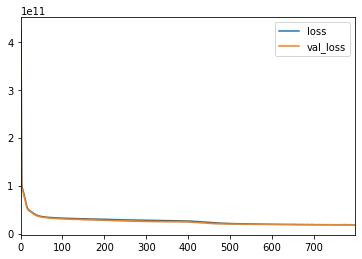

In [195]:
losses.plot()

## Evaluation on Test Data

In [196]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [197]:
X_test

array([[0.1       , 0.08      , 0.04239917, ..., 0.00887725, 0.63636364,
        0.        ],
       [0.3       , 0.36      , 0.17269907, ..., 0.00993734, 0.81818182,
        0.        ],
       [0.2       , 0.24      , 0.12512927, ..., 0.00547073, 0.90909091,
        0.        ],
       ...,
       [0.1       , 0.08      , 0.05584281, ..., 0.00506255, 1.        ,
        0.        ],
       [0.3       , 0.2       , 0.22233713, ..., 0.00774485, 0.09090909,
        1.        ],
       [0.3       , 0.32      , 0.27611169, ..., 0.0196531 , 0.45454545,
        0.        ]])

In [198]:
predictions = model.predict(X_test)

In [199]:
mean_absolute_error(y_test, predictions)

80284.67469979746

In [200]:
mean_squared_error(y_test, predictions)

18417139722.15128

In [201]:
np.sqrt(mean_squared_error(y_test, predictions))

135709.76281075462

In [202]:
explained_variance_score(y_test, predictions)

0.8613396741754726

In [203]:
df['price'].mean()

540296.5735055795

In [204]:
df['price'].median()

450000.0

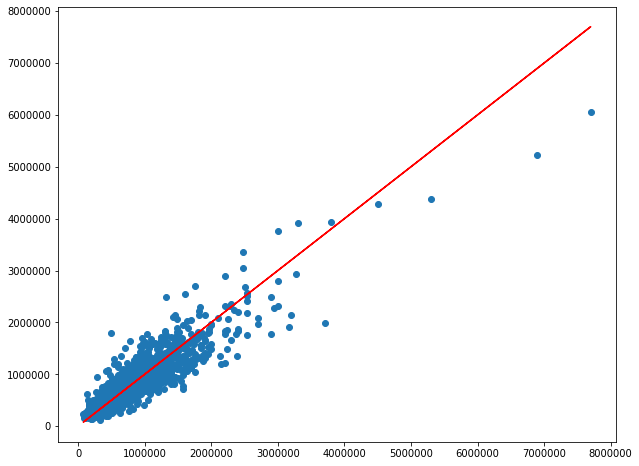

In [205]:
plt.figure(figsize=(10, 8))

plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')

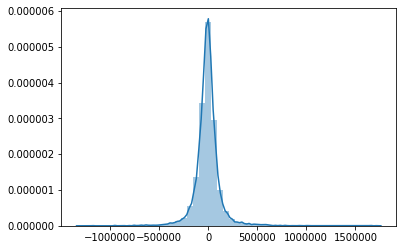

In [206]:
errors = y_test.reshape(6480, 1) - predictions
sns.distplot(errors)

-------
### Predicting on New Data

In [207]:
single_house = df.drop('price', axis=1).iloc[0]

In [208]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

single_house

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.81818182, 0.        ]])

In [209]:
prediction = model.predict(single_house)

In [210]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64

In [211]:
prediction[0] - df.iloc[0]['price']

array([20480.078], dtype=float32)